----------------------------
#### Leveraging transfer learning with pretrained CNN models

- So far, we have built our CNN deep learning models from scratch by specifying our own architecture. 

- Now, we will leverage a pretrained model that is basically an expert in the computer vision domain and renowned for image classification and categorization.
-------------------------------------------

In [2]:
from IPython.display import Image

- Pretrained models are used in the following two popular ways when building new models or reusing them:
    - Using a pretrained model as a `feature extractor`
    - `Fine-tuning` the pretrained model

- Key points ...

    - The `pretrained` model we will be using is the popular `VGG-16` model, created by the Visual Geometry Group at the
    University of Oxford,  http://www.robots.ox.ac.uk/~vgg/research/very_deep/

    - VGG stands for `Visual Geometry Group`

    - The 'deep' refers to the number of layers with `VGG-16` or `VGG-19` consisting of 16 and 19 convolutional layers.

    - The `ImageNet Large Scale Visual Recognition Challenge (ILSVRC)` evaluates algorithms for object detection and image classification at large scale and their models have often secured the first place in this competition.

    - A pretrained model like the VGG-16 is an already trained model on a huge dataset (ImageNet) with a lot of diverse image categories. 

    - Considering this fact, the model should have `learned` a robust hierarchy of features, which are `spatial`, `rotation`, and `translation invariant`

    - Hence, the model, having learned a good representation of features for `over a million images` belonging to `1,000 different categories`, can act as a good feature extractor for new images suitable for computer vision problems. 

    - These new images might never exist in the ImageNet dataset or might be of totally different categories, but the model should still be able to extract relevant features from these images, considering the principles of transfer learning 

#### Understanding the VGG-16 model

- The VGG-16 model is a `16-layer` (convolution and fully connected) network built on the `ImageNet` database, which is built for the purpose of image recognition and classification.

- This model was built by Karen Simonyan and Andrew Zisserman and is mentioned in their paper titled `Very Deep Convolutional Networks for Large-Scale Image Recognition`, arXiv (2014), available at https://arxiv.org/pdf/1409.1556.pdf


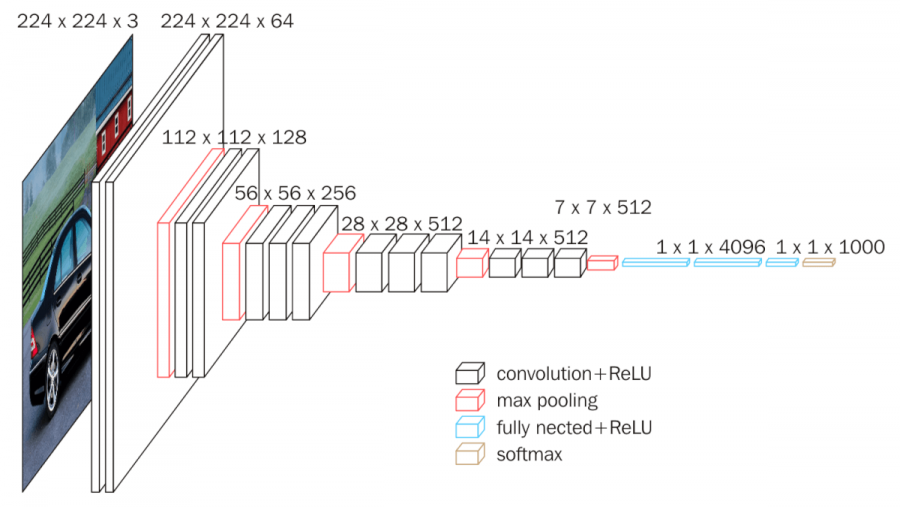

In [8]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\vgg-00.png', width=1000)

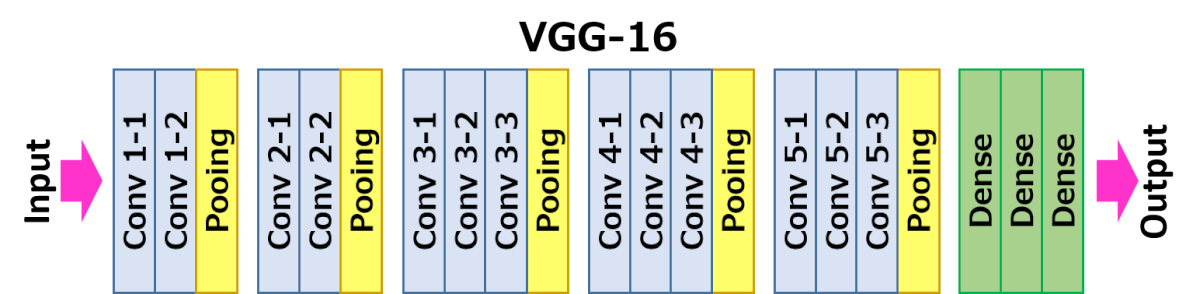

In [7]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\vgg-01.png', width=1000)

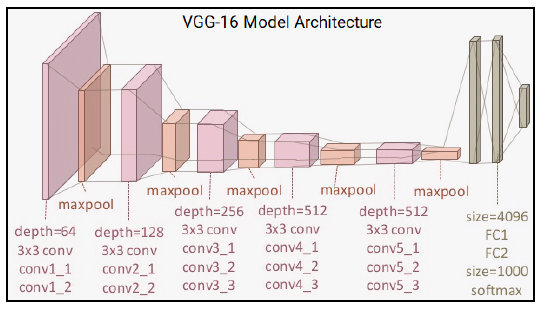

In [9]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\vgg-02.png', width=1000)

**ARCHITECTURE**

- During training, the `input` to our ConvNets is a fixed-size `224 × 224` `RGB` image. 

- The only `preprocessing` we do is `subtracting` the `mean` RGB value, computed on the training set, from each pixel.

- The image is passed through a stack of convolutional (conv.) layers, where we use filters with a very `small` receptive field: `3 × 3` (which is the smallest size to capture the notion of left/right, up/down, center). 

- The convolution stride is fixed to 1 pixel; the spatial padding of conv. layer input is such that the spatial resolution is preserved after convolution, i.e. the padding is 1 pixel for 3 × 3 conv. layers. 

- `Spatial pooling` is carried out by 5 `max-pooling layers`, which follow some of the conv. layers (not all the conv. layers are followed by max-pooling). 

- `Max-pooling` is performed over a 2 × 2 pixel window, with stride 2.

- A stack of convolutional layers (which has a different depth in different architectures) is followed by 3 `Fully-Connected (FC)` layers: 
    - the first two have 4096 channels each, 
    - the third performs 1000- way ILSVRC classification and thus contains 1000 channels (one for each class). 
    
- The final layer is the `soft-max` layer. The configuration of the fully connected layers is the same in all networks.

- All hidden layers are equipped with the rectification (`ReLU` (Krizhevsky et al., 2012)) non-linearity.



- You can clearly see that we have 
    - a total of `13 convolution layers` using 3 x 3 convolution filters along with max pooling layers for downsampling and 
    - a total of `2 fully connected hidden layers` of 4,096 units in each layer 
    - followed by 1 dense layer of 1,000 units, 
    
        - where each unit represents one of the image categories in the ImageNet database.

We `do not need` the last 3 layers since we will be using our own fully connected dense layers to predict whether images will be a dog or a cat. 

We are more concerned with the first 5 blocks, so that we can leverage the VGG model as an effective feature extractor.

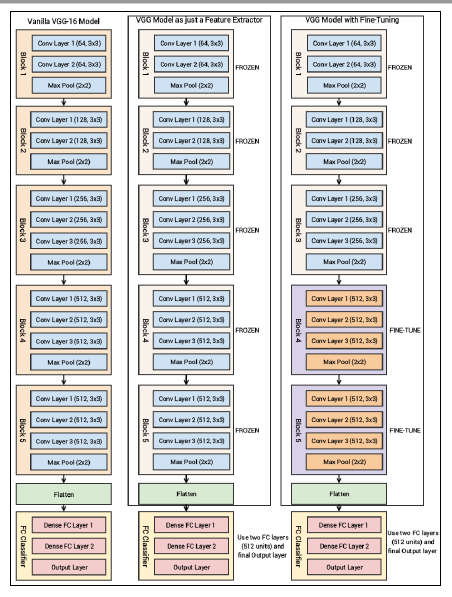

In [11]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\TL-vgg-00.png', width=600)

In [12]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img, img_to_array, array_to_img

from random import sample, randint 

In [13]:
location_train = r'D:\MYLEARN\DATASETS\Images\dogs-vs-cats\train'

In [14]:
train_dir = location_train+'\\'+'training_data'
val_dir   = location_train+'\\'+'validation_data'

In [15]:
train_files = glob.glob(train_dir+'/*')

**Keras load_img**

|Arg        | Description                            |
|-------    | ---------------                        |
|path	    | Path to image file.                    |
|grayscale	| DEPRECATED use color_mode="grayscale". |
|color_mode	| One of "grayscale", "rgb", "rgba". Default: "rgb". The desired image format.|
|target_size| either None (default to original size) or tuple of ints (img_height, img_width).|
|interpolation	| Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.|

In [16]:
IMG_DIM = (150, 150)

<class 'PIL.JpegImagePlugin.JpegImageFile'> JPEG RGB (374, 500)


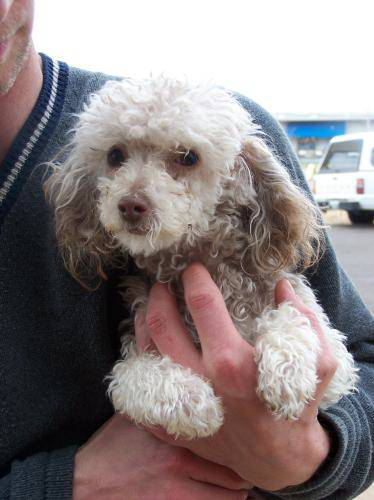

In [17]:
# load a random image
img = load_img(train_files[randint(0, len(train_files))])

# report details about the image
print(type(img), img.format, img.mode, img.size)

array_to_img(img)

We can confirm that the 
- image was loaded as a PIL image in JPEG format 
- with RGB channels and 
- the size of 640 by 427 pixels.... varying sizes

load all training images 
- PIL image (jpeg)

In [18]:
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]

convert to numpy array

In [19]:
train_imgs = np.array(train_imgs)
train_imgs.shape

(3000, 150, 150, 3)

extract labels 

In [20]:
train_labels = [fn.split('.')[0].split('\\')[-1] for fn in train_files]
len(train_labels)

3000

load validation samples

In [21]:
validation_files = glob.glob(val_dir+'/*')

validation_imgs   = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs   = np.array(validation_imgs)
validation_labels = [fn.split('.')[0].split('\\')[-1] for fn in validation_files]
len(validation_labels)


1000

In [59]:
print('Train dataset shape:', train_imgs.shape, '\nValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 
Validation dataset shape: (1000, 150, 150, 3)


- we have 3000 training images and 1000 validation images. 
- Each image is of size 150 x 150 and has 3 channels for red, green, and blue (RGB), hence giving each image the (150, 150, 3) dimensions. 
- We will now scale each image with pixel values between (0, 255) to values between (0, 1) because deep earning models work really well with small input values:

In [60]:
train_imgs_scaled      = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled      /= 255
validation_imgs_scaled /= 255

print('Train dataset shape:', train_imgs_scaled.shape, '\nValidation dataset shape:', validation_imgs_scaled.shape)

Train dataset shape: (3000, 150, 150, 3) 
Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


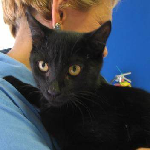

In [63]:
# visualize a sample image
print(train_imgs[0].shape)
array_to_img(train_imgs[25])

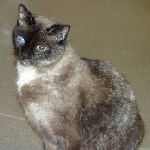

In [62]:
array_to_img(validation_imgs[15])

##### convert labels to numeric

In [26]:
batch_size  = 30
num_classes = 2
epochs      = 30
input_shape = (150, 150, 3)

In [28]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit(train_labels)

train_labels_enc      = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [30]:
le.classes_

array(['cat', 'dog'], dtype='<U3')

In [31]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


#### load VGG model

In [36]:
from keras.applications import vgg16
from keras.models import Model
import keras

In [38]:
vgg = vgg16.VGG16(include_top = False, 
                  weights     = 'imagenet', 
                  input_shape = input_shape)

In [39]:
type(vgg)

keras.engine.functional.Functional

In [41]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [47]:
output = vgg.layers[-1].output

In [48]:
output = keras.layers.Flatten()(output)


In [49]:
vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

# for layer in vgg_model.layers:
#     layer.trainable = False

In [50]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [52]:
import pandas as pd
pd.set_option('max_colwidth', 200)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]

pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001DEE1DE3430>,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0x000001DEE1DE3280>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000001DEE1C00370>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000001DEE1DE5940>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000001DEE1DED940>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000001DEE1BE1D00>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000001DEE1DF5BE0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000001DEE1DF56A0>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000001DEE1DF8C70>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000001DEE1DE5C70>,block3_conv3,False


In [53]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


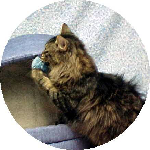

In [64]:
array_to_img(train_imgs_scaled[15])

In [66]:
bottleneck_feature_example = vgg.predict(train_imgs[14:15])

print(bottleneck_feature_example.shape)

(1, 4, 4, 512)


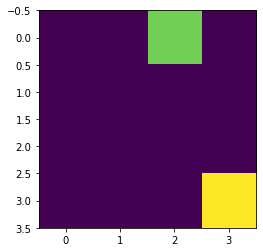

In [68]:
plt.imshow(bottleneck_feature_example[0][:,:,0]);

In [69]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [70]:
train_features_vgg      = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [74]:
import tensorflow
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from tensorflow.keras import optimizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [75]:
input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))

model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


D:\ANACONDA\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [77]:
batch_size  = 30
num_classes = 2
epochs      = 30
input_shape = (150, 150, 3)

In [78]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [79]:
history = model.fit(x              =train_features_vgg, 
                    y              =train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size     =batch_size,
                    epochs         =epochs,
                    verbose        =1,
                    callbacks      =[early_stop, tfdocs.modeling.EpochDots()])

Epoch 1/30
 99/100 [============================>.] - ETA: 0s - loss: 0.4383 - accuracy: 0.7848
Epoch: 0, accuracy:0.7863,  loss:0.4366,  val_accuracy:0.8790,  val_loss:0.2788,  
100/100 [==============================] - 7s 59ms/step - loss: 0.4366 - accuracy: 0.7863 - val_loss: 0.2788 - val_accuracy: 0.8790
Epoch 2/30
100/100 [==============================] - 5s 54ms/step - loss: 0.2772 - accuracy: 0.8810 - val_loss: 0.2388 - val_accuracy: 0.8910
Epoch 3/30
100/100 [==============================] - 6s 55ms/step - loss: 0.2448 - accuracy: 0.8923 - val_loss: 0.2671 - val_accuracy: 0.8800
Epoch 4/30
100/100 [==============================] - 5s 54ms/step - loss: 0.2038 - accuracy: 0.9150 - val_loss: 0.2222 - val_accuracy: 0.8980
Epoch 5/30
100/100 [==============================] - 5s 53ms/step - loss: 0.1714 - accuracy: 0.9363 - val_loss: 0.2328 - val_accuracy: 0.9010
Epoch 6/30
100/100 [==============================] - 5s 54ms/step - loss: 0.1380 - accuracy: 0.9430 - val_loss: 0.26

We get a model with a `validation accuracy` of close to 88%, almost a `5-6% improvement` from our basic `CNN model with image augmentation`, which is excellent.

The model does seem to be `overfitting` though, and we can check this using the accuracy and loss plots depicted in the following diagram:

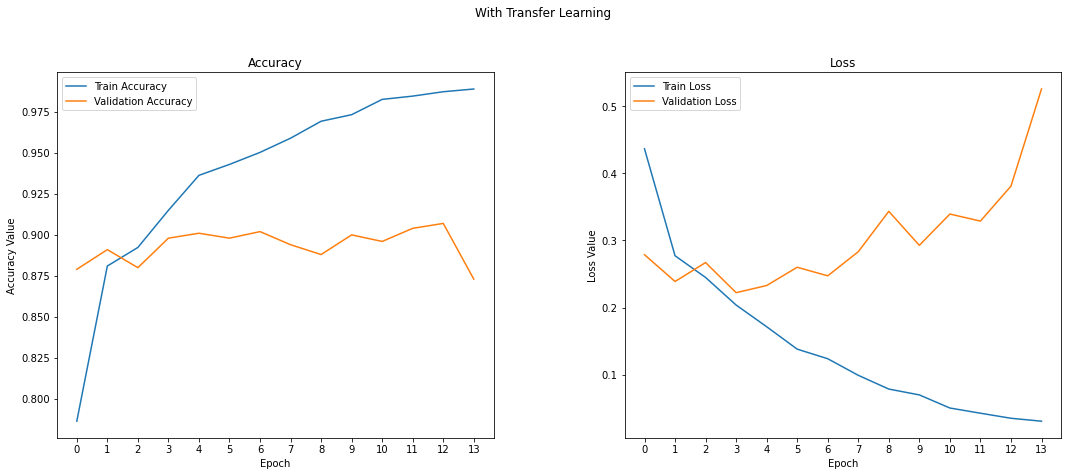

In [81]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
t = f.suptitle('With Transfer Learning', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))

ax1.plot(range(len(history.history['accuracy'])), history.history['accuracy'],     label='Train Accuracy')
ax1.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history.history['accuracy']), 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(range(len(history.history['accuracy'])), history.history['loss'],     label='Train Loss')
ax2.plot(range(len(history.history['accuracy'])), history.history['val_loss'], label='Validation Loss')

ax2.set_xticks(np.arange(0, len(history.history['accuracy']), 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

But overall, this seems to be the best model so far, where by leveraging the VGG-16 model as a feature extractor, we seem to get close to 90% validation accuracy `without even using an image augmentation strategy`. 

But we haven't tapped into the complete potential of transfer learning yet. 

Let's `try using our image augmentation` strategy on this model.

#### Saving model/parameters

In [82]:
import pickle
import os

In [83]:
def model_save(model, encoder, model_save_path):
    _create_folder_if_it_doesnt_exist(model_save_path)
    _save_parameters(model_save_path)
    _save_weights(model_save_path)
    _save_encoder(model_save_path, encoder)

def _create_folder_if_it_doesnt_exist(model_save_path):
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)

def _save_parameters(model_save_path):
    parameters = [
        input_shape,
    ]
    save_parameters_file = os.path.join(model_save_path, "04_CNN_TL_parameters.pkl")
    with open(save_parameters_file, "wb") as f:
        pickle.dump(parameters, f)

def _save_weights(model_save_path):
    save_weights_file = os.path.join(model_save_path, "04_CNN_TL_weights.h5")
    model.save_weights(save_weights_file)
    
def _save_encoder(model_save_path, encoder):
    save_encoder_file = os.path.join(model_save_path, "04_CNN_TL_encoder.pkl")
    with open(save_encoder_file, "wb") as f:
        pickle.dump(encoder, f)



In [84]:
model_save_path = './transfer_learning_models_save'

model_save(model=model, encoder=le, model_save_path=model_save_path)